Importar librerias

In [4]:
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs
import pandas as pd

Lectura archivo con transcripciones pláticas TED

In [34]:
ted=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Data/transcripts.csv')

In [35]:
ted.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


Cambio de transcripciones a minúscula

In [36]:
ted['transcript']=ted['transcript'].str.lower()

Tokenización de transcripciones

In [37]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [41]:
ted['tokens'] = ted.transcript.map(lambda x:tokenizer.tokenize(x))

Remoción de stop words

In [42]:
 #nltk.download('stopwords')

In [43]:
sw = nltk.corpus.stopwords.words('english')
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [44]:
%%time
def remove_sw(text):
    return [word for word in text if word not in sw]
ted['text_sw'] = ted['tokens'].apply(remove_sw)

CPU times: user 10.7 s, sys: 1.43 ms, total: 10.7 s
Wall time: 10.6 s


Obtener las palabras raices de todas las palabras

In [39]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
# stem words in the list of tokenized words
def stem_words(text):
    stems = [stemmer.stem(word) for word in text]
    return stems

In [45]:
%%time
ted['text_sw'] = ted['text_sw'].apply(stem_words)

CPU times: user 56.8 s, sys: 127 ms, total: 56.9 s
Wall time: 57.1 s


Lematización de transcripciones

In [46]:
lemmatizer = WordNetLemmatizer()

In [17]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [47]:
%%time
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]
ted['text_lemmatized'] = ted['text_sw'].apply(lemmatize_text)

CPU times: user 10.1 s, sys: 1.9 ms, total: 10.1 s
Wall time: 10.1 s


In [48]:
import itertools
final=list(itertools.chain.from_iterable(ted['text_lemmatized']))


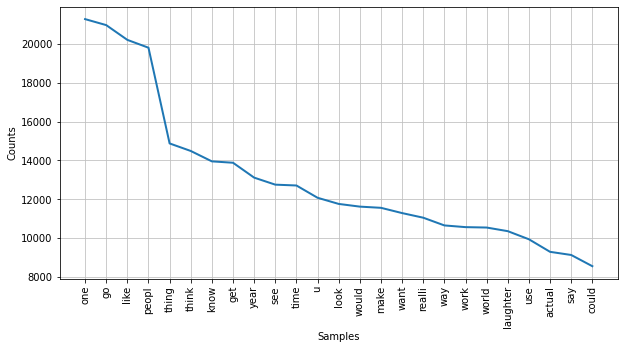

In [49]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(final)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

Podemos ver que aún hay palabras que tenemos que remover como "laughter", "actually","would","really"

Agregamos las palabras que queremos remover y volvemos a ejecutar el script

In [27]:
sw.extend([ "laughter","actually","would","really","u"])

In [28]:
%%time
ted['text_sw'] = ted['tokens'].apply(remove_sw)

CPU times: user 11.8 s, sys: 0 ns, total: 11.8 s
Wall time: 12.2 s


Lematización de transcripciones

In [29]:
%%time
ted['text_lemmatized'] = ted['text_sw'].apply(lemmatize_text)

CPU times: user 10.2 s, sys: 0 ns, total: 10.2 s
Wall time: 10.2 s


In [30]:
final=list(itertools.chain.from_iterable(ted['text_lemmatized']))

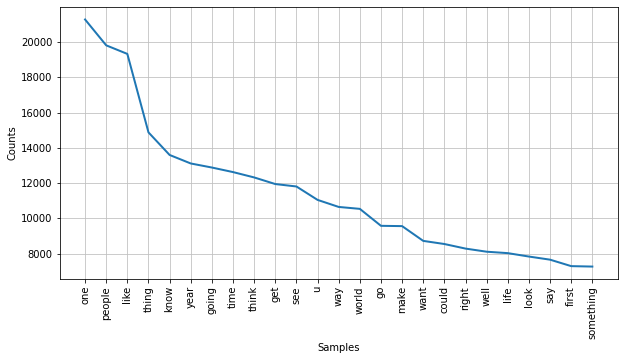

In [31]:
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(final)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

Creamos una nube de palabras para representar de otra manera la frecuencia de las palabras

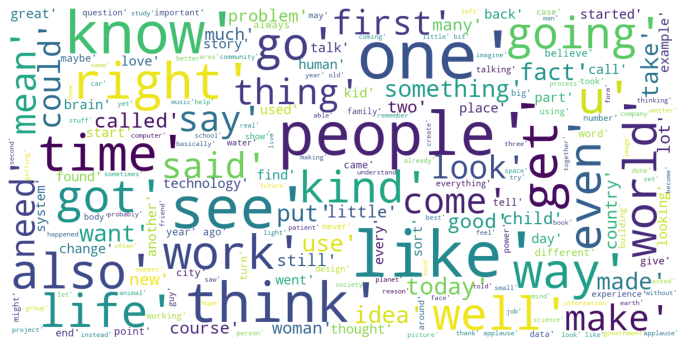

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=sw,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(final)

Lamentablemente no podemos concluir que todas las conferencias TED tengan un tema en común, las palabras más frecuentes son las que más aparecen en cualquier otra conferencia.